### 밴디트 문제
- 손잡이가 하나인 슬롯머신이 여러 대(각각의 특성이 다름)있는 문제
- 플레이어가 정해진 횟수를 플레이하는 동안 결과를 확인하면서 좋은 머신을 찾아 정해진 횟수 안에 코인을 최대한 많이 얻는 것이 목표
- 각 슬롯 머신은 **환경**, 플레이어는 **에이전트**로 이 두 요소가 상호작용하는 것이 강화 학습
- 상호작용
    - 플레이어가 여러 슬롯머신 중 한 대를 선택해 플레이(행동) 함
    - 행동의 결과로 플레이어는 슬롯머신에서 코인을 얻음(보상)
- 목표는 코인을 최대한 많이 얻는 것(승률이 좋은 슬롯 머신을 선택하는 것)
- 밴디트 문제는 플레이어가 이용하는 슬롯머신들의 확률 설정에 변화가 없으므로 상태 정보가 업데이트되지 않음

### 좋은 슬롯머신이란
- 슬롯머신의 주요 특성은 무작위성
    - 무작위성이란, 얻을 수 있는 코인의 개수가 플레이할 때마다 달라지는 것
- 무작위한 정도를 확률을 이용해 정량적으로 평가해야 함
- 수없이 많이 플레이를 하면 평균적으로 얻게되는 코인의 개수가 하나의 확률 분포로 수렴하게 됨
- "0개 : 0.7, 1개 : 0.15, 5개 : 0.12, 10개 : 0.03"의 이산 확률 분포의 경우, 각각의 코인 개수와 해당 확률을 곱하고 모두 더해 **기대값**을 구할 수 있음
    - 해당 확률 분포의 경우 (0 * 0.7) + (1 * 0.15) + (5 * 0.12) + (10 * 0.03) = 1.05가 기대값
- 여기서 기대값을 **가치**라고 부르며, 행동의 결과로 얻는 보상의 기대값을 **행동 가치**라고 부름

### 수식 표현
- 슬롯머신이 돌려주는 코인의 개수(보상) : R
    - 확률 변수라고도 함
    - e.g. R = {0, 1, 5, 10}
    - 행동 순번에 따라 $R_t$로 나타냄
- 에이전트가 수행하는 행동 : A
    - e.g. 슬롯머신 a, b를 선택하는 행동을 a, b라 한다면 A = {a, b}
- 기대값 : $E$
- 행동 가치 : Q or q
    - 행동 A의 행동 가치 : q(A) = E[R|A]

### 정상 문제

In [2]:
import numpy as np

In [15]:
class Bandit:
    def __init__(self, arms = 10):
        self.winRate = np.random.rand(arms)
    def play(self, arm):
        rate = self.winRate[arm]
        if rate > np.random.rand():
            return 1
        else:
            return 0

In [ ]:
class Agent:
    def __init__(self, epsilon, action_size = 10):
        self.epsilon = epsilon
        self.Qs = np.zeros(action_size)
        self.ns = np.zeros(action_size)
    def update(self, action, reward):
        self.ns[action] += 1
        self.Qs[action] += (reward - self.Qs[action]) / self.ns[action]
    def get_action(self):
        if np.random.rand() < self.epsilon:
            return np.random.randint(0, len(self.Qs))
        return np.argmax(self.Qs)

943


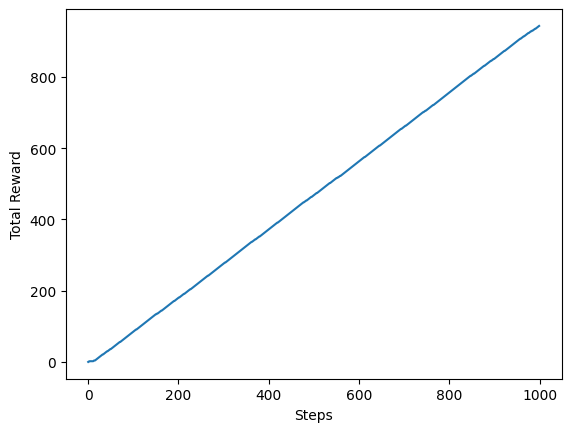

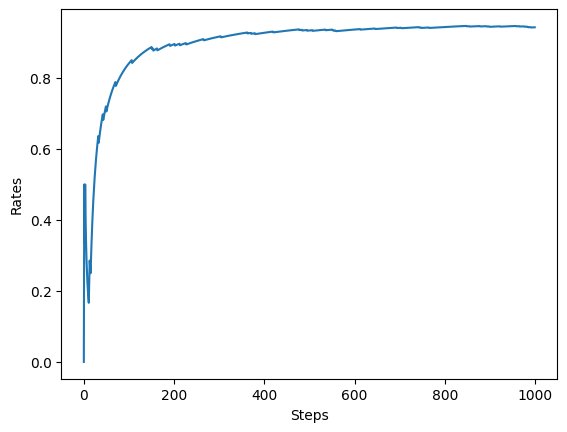

In [18]:
import matplotlib.pyplot as plt

steps = 1000
epsilon = 0.1

bandit = Bandit()
agent = Agent(epsilon)
total_reward = 0
total_rewards = []
rates = []

for step in range(steps):
    action = agent.get_action()
    reward = bandit.play(action)
    agent.update(action, reward)
    total_reward += reward

    total_rewards.append(total_reward)
    rates.append(total_reward/(step + 1))

print(total_reward)

plt.xlabel("Steps")
plt.ylabel("Total Reward")
plt.plot(total_rewards)
plt.show()

plt.xlabel("Steps")
plt.ylabel("Rates")
plt.plot(rates)
plt.show()

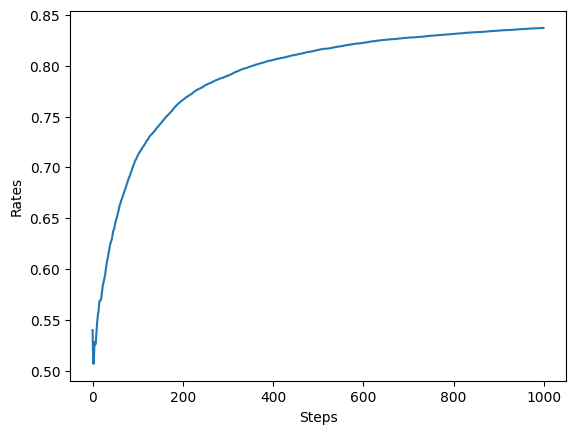

In [ ]:
runs = 200
steps = 1000
epsilon = 0.1
all_rates = np.zeros((runs, steps))

for run in range(runs):
    bandit = Bandit()
    agent = Agent(epsilon)
    total_reward = 0
    rates = []

    for step in range(steps):
        action = agent.get_action()
        reward = bandit.play(action)
        agent.update(action, reward)
        total_reward += reward
        rates.append(total_reward / (step + 1))

    all_rates[run] = rates

avg_rates = np.average(all_rates, axis = 0)

plt.xlabel("Steps")
plt.ylabel("Rates")
plt.plot(avg_rates)
plt.show()

### 비정상 문제

In [24]:
class NonStatBandit:
    def __init__(self, arms = 10):
        self.arms = arms
        self.rates = np.random.rand(arms)
    def play(self, arm):
        rate = self.rates[arm]
        self.rates += 0.1 * np.random.randn(self.arms)
        if rate > np.random.rand():
            return 1
        else:
            return 0

In [25]:
class AlphaAgent:
    def __init__(self, epsilon, alpha, action_size = 10):
        self.epsilon = epsilon
        self.Qs = np.zeros(action_size)
        self.alpha = alpha
    def update(self, action, reward):
        self.Qs[action] += (reward - self.Qs[action]) * self.alpha
    def get_action(self):
        if np.random.rand() < self.epsilon:
            return np.random.randint(0, len(self.Qs))
        return np.argmax(self.Qs)

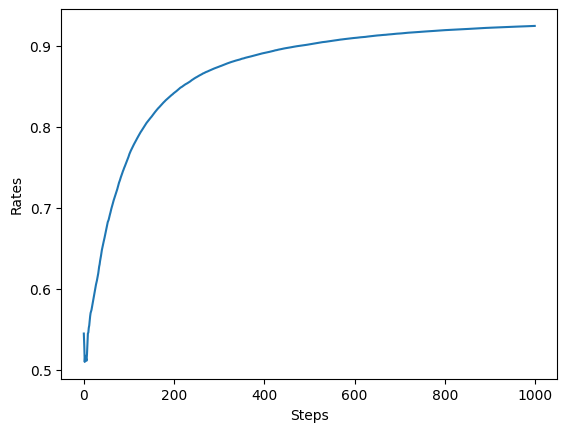

In [27]:
runs = 200
steps = 1000
epsilon = 0.1
all_rates = np.zeros((runs, steps))

for run in range(runs):
    bandit = NonStatBandit()
    agent = AlphaAgent(epsilon, alpha = 0.8)
    total_reward = 0
    rates = []

    for step in range(steps):
        action = agent.get_action()
        reward = bandit.play(action)
        agent.update(action, reward)
        total_reward += reward
        rates.append(total_reward / (step + 1))

    all_rates[run] = rates

avg_rates = np.average(all_rates, axis = 0)

plt.xlabel("Steps")
plt.ylabel("Rates")
plt.plot(avg_rates)
plt.show()